In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import optuna
from engine import Engine
sns.set()
from timeit import timeit
from config import *
from functions import *
from custom_torch_objects import *

/Users/josh/Documents/QMUL/DISSERTATION/MockFish/venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
NETWORK_PATHS = [get_model_path(MODELS_DIR, p, puzzle=puzzle) for puzzle in [False, True] for p in ['selector', 'p', 'b', 'n', 'r', 'q', 'k']]
print(NETWORK_PATHS)

['./models/Mockfish_selector_4e_7087b.pth', './models/Mockfish_p_3e_7665b.pth', './models/Mockfish_b_4e_2066b.pth', './models/Mockfish_n_4e_5736b_puzzles.pth', './models/Mockfish_r_4e_5476b.pth', './models/Mockfish_q_4e_4700b.pth', './models/Mockfish_k_4e_2432b_puzzles.pth', './models/Mockfish_selector_5e_13352b_puzzles.pth', './models/Mockfish_p_4e_1830b_puzzles.pth', './models/Mockfish_b_4e_1285b_puzzles.pth', './models/Mockfish_n_4e_5736b_puzzles.pth', './models/Mockfish_r_3e_16890b_puzzles.pth', './models/Mockfish_q_3e_14955b_puzzles.pth', './models/Mockfish_k_4e_2432b_puzzles.pth']


In [3]:
engine = Engine(*NETWORK_PATHS)

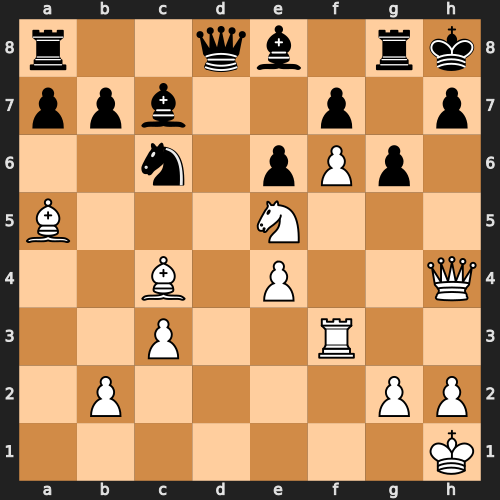

In [31]:
puzzle_fen = 'r2qb1rk/ppb2p1p/2n1pPp1/B3N3/2B1P2Q/2P2R2/1P4PP/7K w - - 0 1'
board = chess.Board(fen=puzzle_fen)
display(chess.svg.board(board, size=500, flipped = not board.turn))

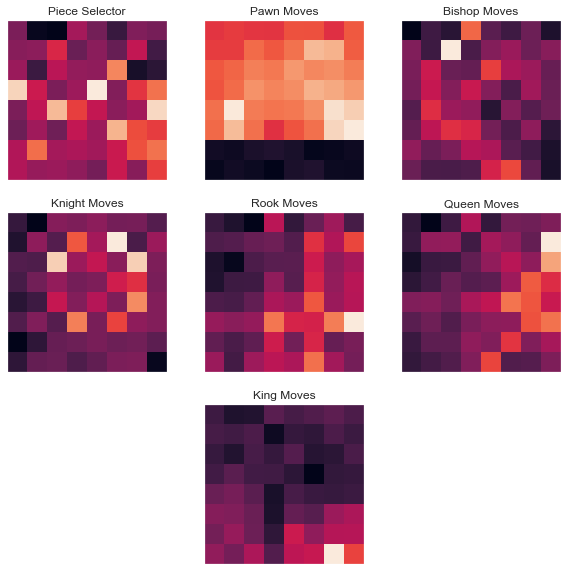

In [68]:
PUZZLE_MODE=True

fig, axs = plt.subplots(3, 3, figsize=(10,10))

axs[0,0].imshow(engine.get_scores(network='selector', fen=puzzle_fen, white_turn=True, puzzle_mode=PUZZLE_MODE))
axs[0,0].set_title("Piece Selector")
axs[0,0].grid(False)
axs[0,0].xaxis.set_visible(False)
axs[0,0].yaxis.set_visible(False)

axs[0,1].imshow(engine.get_scores(network='p', fen=puzzle_fen, white_turn=True, puzzle_mode=PUZZLE_MODE))
axs[0,1].set_title("Pawn Moves")
axs[0,1].grid(False)
axs[0,1].xaxis.set_visible(False)
axs[0,1].yaxis.set_visible(False)

axs[0,2].imshow(engine.get_scores(network='b', fen=puzzle_fen, white_turn=True, puzzle_mode=PUZZLE_MODE))
axs[0,2].set_title("Bishop Moves")
axs[0,2].grid(False)
axs[0,2].xaxis.set_visible(False)
axs[0,2].yaxis.set_visible(False)

axs[1,0].imshow(engine.get_scores(network='n', fen=puzzle_fen, white_turn=True, puzzle_mode=PUZZLE_MODE))
axs[1,0].set_title("Knight Moves")
axs[1,0].grid(False)
axs[1,0].xaxis.set_visible(False)
axs[1,0].yaxis.set_visible(False)

axs[1,1].imshow(engine.get_scores(network='r', fen=puzzle_fen, white_turn=True, puzzle_mode=PUZZLE_MODE))
axs[1,1].set_title("Rook Moves")
axs[1,1].grid(False)
axs[1,1].xaxis.set_visible(False)
axs[1,1].yaxis.set_visible(False)

axs[1,2].imshow(engine.get_scores(network='q', fen=puzzle_fen, white_turn=True, puzzle_mode=PUZZLE_MODE))
axs[1,2].set_title("Queen Moves")
axs[1,2].grid(False)
axs[1,2].xaxis.set_visible(False)
axs[1,2].yaxis.set_visible(False)

axs[2,1].imshow(engine.get_scores(network='k', fen=puzzle_fen, white_turn=True, puzzle_mode=PUZZLE_MODE))
axs[2,1].set_title("King Moves")
axs[2,1].grid(False)
axs[2,1].xaxis.set_visible(False)
axs[2,1].yaxis.set_visible(False)

fig.delaxes(axs[2,0])
fig.delaxes(axs[2,2])

plt.savefig(IMAGE_DIR + "p_mockfish_puzzle_vis.png", bbox_inches="tight")

In [56]:
ps_accuracy = pd.read_csv(RESULTS_DIR + 'training/Mockfish_selector_accuracies.csv')
p_accuracy = pd.read_csv(RESULTS_DIR + 'training/Mockfish_p_accuracies.csv')
b_accuracy = pd.read_csv(RESULTS_DIR + 'training/Mockfish_b_accuracies.csv')
n_accuracy = pd.read_csv(RESULTS_DIR + 'training/Mockfish_n_accuracies.csv')
r_accuracy = pd.read_csv(RESULTS_DIR + 'training/Mockfish_r_accuracies.csv')
q_accuracy = pd.read_csv(RESULTS_DIR + 'training/Mockfish_q_accuracies.csv')
k_accuracy = pd.read_csv(RESULTS_DIR + 'training/Mockfish_k_accuracies.csv')

ps_losses = pd.read_csv(RESULTS_DIR + 'training/Mockfish_selector_losses.csv')
p_losses= pd.read_csv(RESULTS_DIR + 'training/Mockfish_p_losses.csv')
b_losses = pd.read_csv(RESULTS_DIR + 'training/Mockfish_b_losses.csv')
n_losses = pd.read_csv(RESULTS_DIR + 'training/Mockfish_n_losses.csv')
r_losses = pd.read_csv(RESULTS_DIR + 'training/Mockfish_r_losses.csv')
q_losses = pd.read_csv(RESULTS_DIR + 'training/Mockfish_q_losses.csv')
k_losses = pd.read_csv(RESULTS_DIR + 'training/Mockfish_k_losses.csv')

In [57]:
puzzle_ps_accuracy = pd.read_csv('./results/puzzle_training/Mockfish_selector_accuracies_puzzles.csv')
puzzle_p_accuracy = pd.read_csv('./results/puzzle_training/Mockfish_p_accuracies_puzzles.csv')
puzzle_b_accuracy = pd.read_csv('./results/puzzle_training/Mockfish_b_accuracies_puzzles.csv')
puzzle_n_accuracy = pd.read_csv('./results/puzzle_training/Mockfish_n_accuracies_puzzles.csv')
puzzle_r_accuracy = pd.read_csv('./results/puzzle_training/Mockfish_r_accuracies_puzzles.csv')
puzzle_q_accuracy = pd.read_csv('./results/puzzle_training/Mockfish_q_accuracies_puzzles.csv')
puzzle_k_accuracy = pd.read_csv('./results/puzzle_training/Mockfish_k_accuracies_puzzles.csv')

puzzle_ps_losses = pd.read_csv('./results/puzzle_training/Mockfish_selector_losses_puzzles.csv')
puzzle_p_losses = pd.read_csv('./results/puzzle_training/Mockfish_p_losses_puzzles.csv')
puzzle_b_losses = pd.read_csv('./results/puzzle_training/Mockfish_b_losses_puzzles.csv')
puzzle_n_losses = pd.read_csv('./results/puzzle_training/Mockfish_n_losses_puzzles.csv')
puzzle_r_losses = pd.read_csv('./results/puzzle_training/Mockfish_r_losses_puzzles.csv')
puzzle_q_losses = pd.read_csv('./results/puzzle_training/Mockfish_q_losses_puzzles.csv')
puzzle_k_losses = pd.read_csv('./results/puzzle_training/Mockfish_k_losses_puzzles.csv')

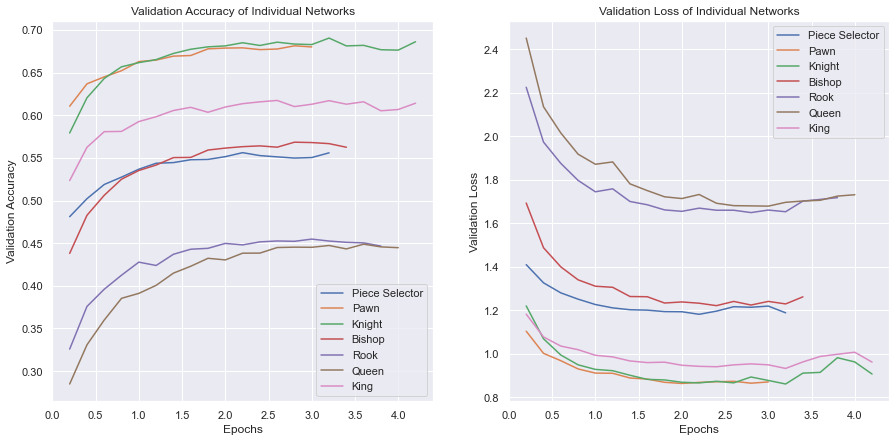

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

axs[0].plot(ps_accuracy.iterations_proportions, ps_accuracy.validAccuracies, label="Piece Selector")
axs[0].plot(p_accuracy.iterations_proportions, p_accuracy.validAccuracies, label="Pawn")
axs[0].plot(n_accuracy.iterations_proportions, n_accuracy.validAccuracies, label="Knight")
axs[0].plot(b_accuracy.iterations_proportions, b_accuracy.validAccuracies, label="Bishop")
axs[0].plot(r_accuracy.iterations_proportions, r_accuracy.validAccuracies, label="Rook")
axs[0].plot(q_accuracy.iterations_proportions, q_accuracy.validAccuracies, label="Queen")
axs[0].plot(k_accuracy.iterations_proportions, k_accuracy.validAccuracies, label="King")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Validation Accuracy")
axs[0].set_title("Validation Accuracy of Individual Networks")
axs[0].legend()
#axs[0].savefig(IMAGE_DIR + "network_validation_error.png")

axs[1].plot(ps_losses.iterations_proportions, ps_losses.validLosses, label="Piece Selector")
axs[1].plot(p_losses.iterations_proportions, p_losses.validLosses, label="Pawn")
axs[1].plot(n_losses.iterations_proportions, n_losses.validLosses, label="Knight")
axs[1].plot(b_losses.iterations_proportions, b_losses.validLosses, label="Bishop")
axs[1].plot(r_losses.iterations_proportions, r_losses.validLosses, label="Rook")
axs[1].plot(q_losses.iterations_proportions, q_losses.validLosses, label="Queen")
axs[1].plot(k_losses.iterations_proportions, k_losses.validLosses, label="King")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Validation Loss")
axs[1].set_title("Validation Loss of Individual Networks")
axs[1].legend()

plt.savefig(IMAGE_DIR+ "val_acc_losses.png")

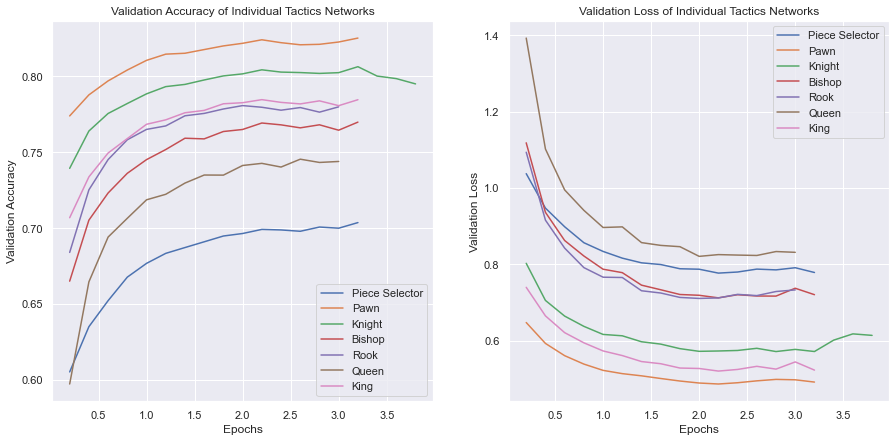

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

axs[0].plot(puzzle_ps_accuracy.iterations_proportions, puzzle_ps_accuracy.validAccuracies, label="Piece Selector")
axs[0].plot(puzzle_p_accuracy.iterations_proportions, puzzle_p_accuracy.validAccuracies, label="Pawn")
axs[0].plot(puzzle_n_accuracy.iterations_proportions, puzzle_n_accuracy.validAccuracies, label="Knight")
axs[0].plot(puzzle_b_accuracy.iterations_proportions, puzzle_b_accuracy.validAccuracies, label="Bishop")
axs[0].plot(puzzle_r_accuracy.iterations_proportions, puzzle_r_accuracy.validAccuracies, label="Rook")
axs[0].plot(puzzle_q_accuracy.iterations_proportions, puzzle_q_accuracy.validAccuracies, label="Queen")
axs[0].plot(puzzle_k_accuracy.iterations_proportions, puzzle_k_accuracy.validAccuracies, label="King")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Validation Accuracy")
axs[0].set_title("Validation Accuracy of Individual Tactics Networks")
axs[0].legend()
#axs[0].savefig(IMAGE_DIR + "network_validation_error.png")

axs[1].plot(puzzle_ps_losses.iterations_proportions, puzzle_ps_losses.validLosses, label="Piece Selector")
axs[1].plot(puzzle_p_losses.iterations_proportions, puzzle_p_losses.validLosses, label="Pawn")
axs[1].plot(puzzle_n_losses.iterations_proportions, puzzle_n_losses.validLosses, label="Knight")
axs[1].plot(puzzle_b_losses.iterations_proportions, puzzle_b_losses.validLosses, label="Bishop")
axs[1].plot(puzzle_r_losses.iterations_proportions, puzzle_r_losses.validLosses, label="Rook")
axs[1].plot(puzzle_q_losses.iterations_proportions, puzzle_q_losses.validLosses, label="Queen")
axs[1].plot(puzzle_k_losses.iterations_proportions, puzzle_k_losses.validLosses, label="King")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Validation Loss")
axs[1].set_title("Validation Loss of Individual Tactics Networks")
axs[1].legend()

plt.savefig(IMAGE_DIR + "puzzle_acc_losses.png")


In [60]:
test_accuracy = pd.read_pickle(RESULTS_DIR + 'testing_results.pickle')
test_accuracy

,network,accuracy,class_accuracy,confusion_matrix
0,selector,0.555959,"[tensor(0.5114), tensor(0.5927), tensor(0.5343...","[[tensor(4195.), tensor(63.), tensor(172.), te..."
1,p,0.678025,"[tensor(nan), tensor(nan), tensor(nan), tensor...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0..."
2,b,0.567209,"[tensor(0.2963), tensor(0.3350), tensor(0.4558...","[[tensor(64.), tensor(0.), tensor(24.), tensor..."
3,n,0.688471,"[tensor(0.4355), tensor(0.3668), tensor(0.4884...","[[tensor(27.), tensor(0.), tensor(4.), tensor(..."
4,r,0.452362,"[tensor(0.3179), tensor(0.4881), tensor(0.5361...","[[tensor(585.), tensor(68.), tensor(117.), ten..."
5,q,0.447986,"[tensor(0.2763), tensor(0.3523), tensor(0.3279...","[[tensor(92.), tensor(11.), tensor(10.), tenso..."
6,k,0.618685,"[tensor(0.6519), tensor(0.8269), tensor(0.5815...","[[tensor(1247.), tensor(113.), tensor(142.), t..."


In [61]:
puzzle_test_accuracy = pd.read_pickle(RESULTS_DIR + "puzzle_testing_results.pickle")
puzzle_test_accuracy

,network,accuracy,class_accuracy,confusion_matrix
0,selector,0.702337,"[tensor(0.6128), tensor(0.7698), tensor(0.6255...","[[tensor(10274.), tensor(76.), tensor(148.), t..."
1,p,0.822488,"[tensor(nan), tensor(nan), tensor(nan), tensor...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0..."
2,b,0.769290,"[tensor(0.8329), tensor(0.7313), tensor(0.7909...","[[tensor(304.), tensor(0.), tensor(4.), tensor..."
3,n,0.801667,"[tensor(0.8621), tensor(0.7667), tensor(0.8145...","[[tensor(125.), tensor(0.), tensor(4.), tensor..."
4,r,0.780930,"[tensor(0.7336), tensor(0.6558), tensor(0.7754...","[[tensor(1878.), tensor(18.), tensor(48.), ten..."
5,q,0.739701,"[tensor(0.6820), tensor(0.6469), tensor(0.7086...","[[tensor(444.), tensor(3.), tensor(3.), tensor..."
6,k,0.784545,"[tensor(0.8331), tensor(0.8407), tensor(0.7432...","[[tensor(7100.), tensor(202.), tensor(334.), t..."


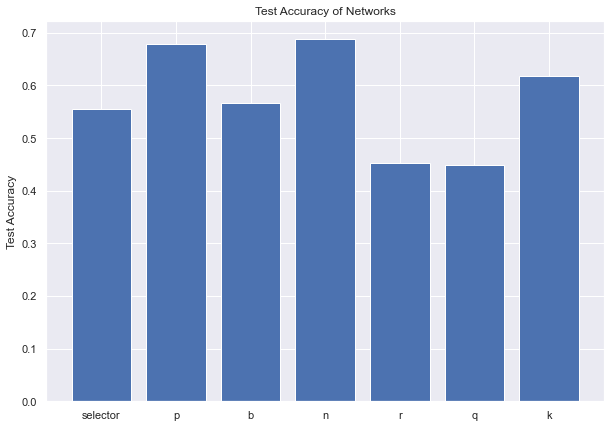

In [63]:
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(test_accuracy)), test_accuracy.accuracy, label="Regular Networks")
plt.title("Test Accuracy of Networks")
plt.xticks(np.arange(len(test_accuracy)), test_accuracy.network)
plt.ylabel("Test Accuracy")
plt.savefig(IMAGE_DIR + "test_accuracy.png")

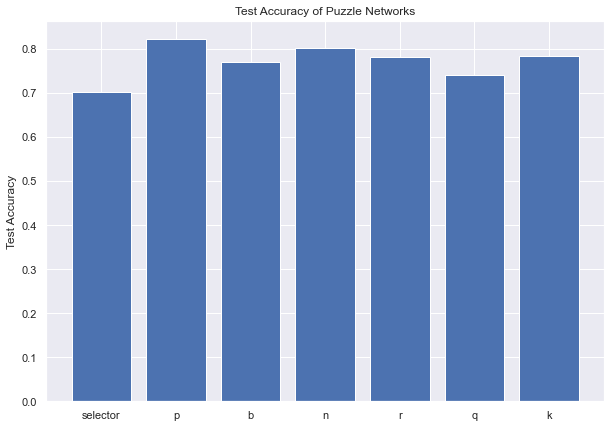

In [64]:
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(puzzle_test_accuracy)), puzzle_test_accuracy.accuracy, label="Puzzle Networks")
plt.title("Test Accuracy of Puzzle Networks")
plt.xticks(np.arange(len(puzzle_test_accuracy)), puzzle_test_accuracy.network)
plt.ylabel("Test Accuracy")
plt.savefig(IMAGE_DIR + "puzzle_test_accuracy.png")

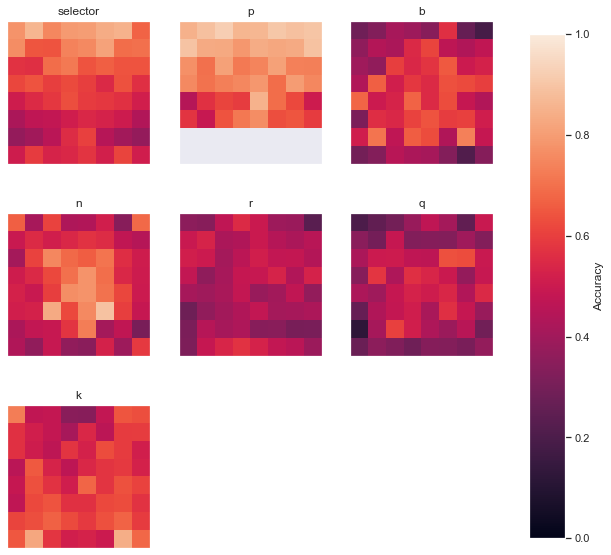

In [65]:
fig, axs = plt.subplots(3, 3, figsize=(10,10))
for i, ax in enumerate(axs.ravel()[:7]):
    im = ax.imshow(test_accuracy.class_accuracy.iloc[i].reshape(8,8).flip([0]), vmin=0, vmax=1)
    ax.set_title(test_accuracy.network.iloc[i])
    ax.grid(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
fig.delaxes(axs[2][1])
fig.delaxes(axs[2, 2])

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("Accuracy")

plt.savefig(IMAGE_DIR + "conf_matrix.png")

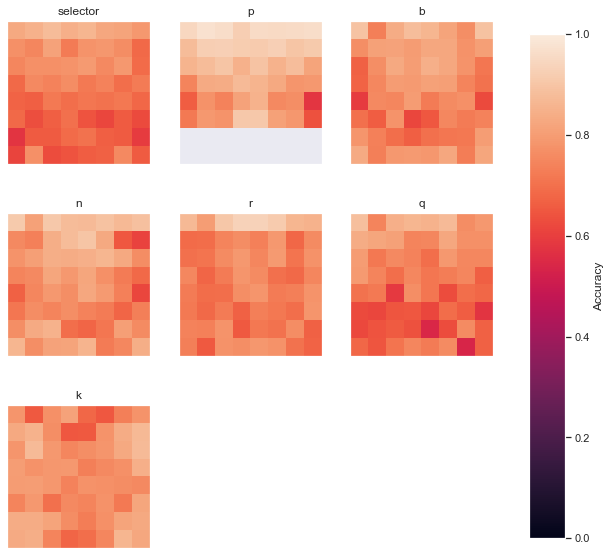

In [66]:
fig, axs = plt.subplots(3, 3, figsize=(10,10))
for i, ax in enumerate(axs.ravel()[:7]):
    im = ax.imshow(puzzle_test_accuracy.class_accuracy.iloc[i].reshape(8,8).flip([0]), vmin=0, vmax=1)
    ax.set_title(puzzle_test_accuracy.network.iloc[i])
    ax.grid(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
fig.delaxes(axs[2][1])
fig.delaxes(axs[2, 2])

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("Accuracy")

plt.savefig(IMAGE_DIR + "puzzle_conf_matrix.png")


# Hyperparameter Tuning

In [33]:
with open(RESULTS_DIR+"study.pickle", "rb") as f:
    study = pickle.load(f)

In [49]:
optuna.visualization.plot_param_importances(study)